# A Digital Twin Approach to World Cup Modelling

Prever resultados de jogos é um passatempo, e ganha pão, de muitos nerds, sendo a Copa do Mundo o maior troféu. Você consegue achar predições usando uma [grande](http://previsaoesportiva.com.br/campeonatos/copa2018/boxplot.html) [variedade](http://www.chancedegol.com.br/copa18.htm) de [modelos](https://www.kaggle.com/agostontorok/soccer-world-cup-2018-winner/notebook) por aí, mas aqui vamos pensar em algo um pouco diferente. E se tivéssemos um Digital Twin de cada seleção?

[Um gêmeo digital é uma cópia digital de uma coisa física](https://en.wikipedia.org/wiki/Digital_twin). Como a cópia é digital, você pode usar ela para prever muitas coisas impraticáveis no mundo físico, como simular urubus entrando no digital twin de uma turbina de avião ou anteceder falhas em turbinas eólicas em locais inacessíveis.

É claro que definir esse bixo é muito mais fácil do que construir ele. Muita gente também vai se perguntar se isso não é a mesma coisa que as simulações da engenharia, ou machine learning e otimização. A resposta é: sim e não.

![Isso tem que ser falado](infelizmente.jpg)

Você forma um digital twin com um pouco de tudo isso aí. Um sistema de muitas partículas interagindo, como uma proteína, pode ser simulada através da descrição física de como cada um de seus vários atómos reage de acordo com variáveis do ambiente e interação com outros átomos. Em sistemas mais complicados, como pessoas conversando ou processos mais complexos, não temos o luxo de, partindo das leis da física, prever como uma pessoa vai agir. E daí entra o Machine Learning: aprendemos com o histórico como representar uma certa entidade e, depois, estamos livres para simular ela interagindo com o mundo e outras entidades.

No problema da Copa do Mundo temos duas possibilidades: podemos separar os dados de cada seleção e construir um modelo para cada, ou podemos fazer um grande preditor de resultado de jogos, olhando para todos os resultados de todos os jogos e, na hora do uso, alimentarmos essa máquina com somente os jogos de uma seleção para prever os seus resultados. A primeira abordagem é um pouco mais óbvia: jogos e dados do Brasil são usados para prever resultados do Brasil. Entretanto a segunda abordagem, mesmo que mais confusa, é mais rica: ela permite aproveitarmos todos os dados disponíveis e fazer previsões para o Brasil utilizando situações parecidas que ocorreram com outras seleções.

Em todo caso, é melhor avançarmos aos poucos. Na Seção 1 descrevo os dados que considerei na modelagem. Na Seção 2 faço um Digital Twin exclusivo com dados do Brasil e, na Seção 3, generalizo para construção de um Digital Twin de seleções.

# 1. Dados que eu peguei de outra pessoa

O usuário do Kaggle Agostonkorok já nos fez o grande favor de coletar os [principais dados](https://www.kaggle.com/agostontorok/soccer-world-cup-2018-winner/notebook) utilizados na previsão de jogos de seleções. Temos três conjuntos.

O primeiro é o ranking da Fifa, que contém a posição de cada país com uma precisão absurda (mensal):

In [1]:
import pandas as pd

ranking_fifa = pd.read_csv("Data/fifa_ranking.csv")
print(ranking_fifa.shape)
ranking_fifa

(57793, 16)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
1,2,Italy,ITA,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
2,3,Switzerland,SUI,0.00,50,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
3,4,Sweden,SWE,0.00,55,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
4,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.00,54,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
6,7,Russia,RUS,0.00,52,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
7,8,Brazil,BRA,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.00,49,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
9,10,Denmark,DEN,0.00,51,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08


Tab. 1. Ranking da Fifa. Tem informação aí desde 1993, melhor que muito dado público que se vê por aí. 

O segundo é uma mistura de dados históricos sobre as seleções da copa atual e informações sobre os jogos da primeira fase:

In [2]:
world_cup = pd.read_csv("Data/World Cup 2018 Dataset.csv")
print(world_cup.shape)
world_cup.head(5)

(33, 20)


,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


Tab. 2: Resumo sobre as seleções da copa. Mas que excelente ideia colocar informações passadas e futuras na mesma tabela.

Por último, e mais importante, um resumo do resultado de todos os jogos entre seleções da história

In [3]:
game_result = pd.read_csv("Data/results.csv")
print(game_result.shape)
game_result.head(5)

(39045, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Tab. 3. Todos os jogos da história. Nessa tabela o Palmeiras também não tem mundial.

Nossos dados contém dois tipos de informação. As tabelas ranking_fifa e world_cup contém dados sobre o perfil da seleção, enquanto a tabela game_result contém uma espécie de linha do tempo de uma seleção. Essa distinção será muito importante para um Digital Twin, já que o queremos prever é uma continuação dessa linha do tempo.

# 2. Digital Twin do Brasil

Vamos filtrar os dados para considerar somente os jogos do Brasil no histórico. Vou desconsiderar informações de mandante de campo porque é difícil considerar isso em uma copa do mundo.

In [4]:
game_result_brasil_home = game_result[game_result['home_team'] == 'Brazil']
print(game_result_brasil_home.shape)

game_result_brasil_away = game_result[game_result['away_team'] == 'Brazil']
print(game_result_brasil_away.shape)

def vconcat_home_away_results(away_df,home_df):    
    
    results = pd.concat([away_df.rename(columns={'home_team' : 'team2','away_team':'team1',
                    'home_score': 'team2_score','away_score':'team1_score'}),\
                         home_df.rename(columns={'home_team' : 'team1','away_team':'team2',
                    'home_score': 'team1_score','away_score':'team2_score'})])
    
    results['AAAA-MM'] = results['date'].str[:7]
    
    return results.drop(['tournament','city','country','neutral'],axis=1)

game_results_brasil = vconcat_home_away_results(game_result_brasil_away,game_result_brasil_home)
print(game_results_brasil.shape)
game_results_brasil.head(5)

(548, 9)
(403, 9)
(951, 6)


,date,team1,team1_score,team2,team2_score,AAAA-MM
398,1914-09-20,Brazil,0,Argentina,3,1914-09
399,1914-09-27,Brazil,1,Argentina,0,1914-09
424,1916-07-10,Brazil,1,Argentina,1,1916-07
429,1916-07-18,Brazil,1,Uruguay,0,1916-07
454,1917-10-03,Brazil,2,Argentina,4,1917-10


Text(0,0.5,'Gols')

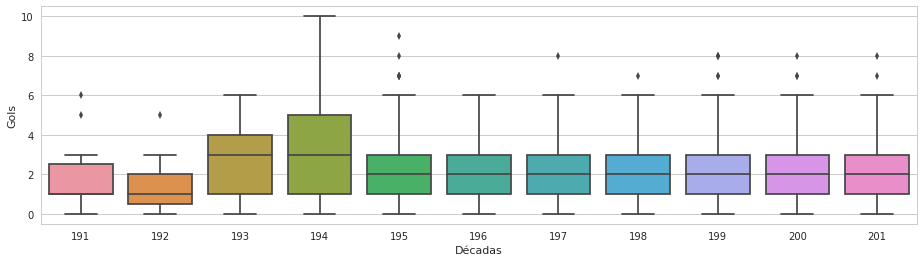

In [5]:
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,4)})
sns.set_style("whitegrid")

ax = sns.boxplot(y=game_results_brasil['team1_score'], 
                 x=game_results_brasil['AAAA-MM'].str[:3])
ax.set_xlabel('Décadas')
ax.set_ylabel('Gols')

Tab. 4. Gols do Brasil ao longo das décadas. As coisas foram animadas mesmo nos anos 40.

Preciso de informações do ranking do Brasil (team1) e do adversário (team2) no momento do jogo. Essas são as informações de "perfil" dos nossos times, enquanto os jogos representam a linha do tempo da seleção.

Filtrar com a tabela de rankings da Fifa também ajuda a manter somente informações de jogos mais recentes.

In [6]:
ranking_fifa['AAAA-MM'] = ranking_fifa['rank_date'].str[:7]

game_results_rkteam1 = pd.merge(game_results_brasil, ranking_fifa.drop('country_abrv',axis=1),
                        left_on=['team1','AAAA-MM'],
                        right_on = ['country_full','AAAA-MM'],
                        how='inner',
                       )

game_results_rk_brasil = pd.merge(game_results_rkteam1, ranking_fifa.drop('country_abrv',axis=1),
                        left_on=['team2','AAAA-MM'],
                        right_on = ['country_full','AAAA-MM'],
                        how='inner',
                        suffixes=('','_away')
                       )

game_results_rk_brasil.shape

(342, 36)

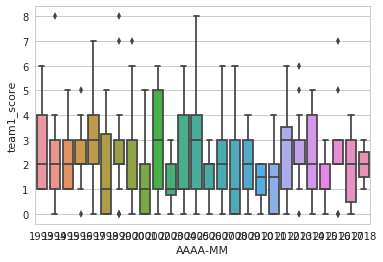

In [7]:
ax = sns.boxplot(y=game_results_rk_brasil['team1_score'], 
                 x=game_results_rk_brasil['AAAA-MM'].str[:4])

Como temos poucos jogos, vamos tentar prever somente se houve vitória, derrota ou empate do Brasil.

In [8]:
def construct_target(df,team1_score_feature,team2_score_feature):    
    return df.apply(lambda row : 'WIN' if row[team1_score_feature] > row[team2_score_feature]
                                       else 'LOS' if row[team2_score_feature] > row[team1_score_feature]
                                       else 'DRW',axis=1)

game_results_rk_brasil['TARGET'] = construct_target(game_results_rk_brasil,'team1_score','team2_score')
game_results_rk_brasil[['team1_score','team2_score','TARGET']].head(5)

,team1_score,team2_score,TARGET
0,5,1,WIN
1,1,1,DRW
2,1,1,DRW
3,2,0,WIN
4,6,0,WIN


In [9]:
game_results_rk_brasil.groupby(by='TARGET').count()['date']

TARGET
DRW     70
LOS     48
WIN    224
Name: date, dtype: int64

Podemos também acrescentar mais algumas variáveis sobre a linha do tempo do Brasil. Podemos construir algumas variáveis sobre o desempenho do brasil nos jogos anteriores ao nosso alvo: 

In [10]:
import numpy as np

def add_timeline_team_features(game_results_country):

    game_results_country = game_results_country.sort_values(by='date',ascending=True)

    max_past = 11
    for i in range(1,max_past):
        game_results_country['won_last%d_game'%i] = game_results_country['TARGET'].shift(i).map(lambda x: 1.0 if x=='WIN' else 0.0)
        game_results_country['los_last%d_game'%i] = game_results_country['TARGET'].shift(i).map(lambda x: 1.0 if x=='LOS' else 0.0)
    
    won_mc = game_results_country.apply(lambda row : list(np.polyfit([i for i in range(1,max_past)],\
                                                                     [row['won_last%d_game'%i] for i in range(1,max_past)],deg=1)),axis=1) 
    los_mc = game_results_country.apply(lambda row : list(np.polyfit([i for i in range(1,max_past)],\
                                                                     [row['los_last%d_game'%i] for i in range(1,max_past)],deg=1)),axis=1) 
    
    game_results_country['won_ang_coef'] = won_mc.map(lambda x: x[0])
    game_results_country['won_lin_coef'] = won_mc.map(lambda x: x[1])
    
    game_results_country['los_ang_coef'] = los_mc.map(lambda x: x[0])
    game_results_country['los_lin_coef'] = los_mc.map(lambda x: x[1])    
    
    return game_results_country

In [11]:
game_results_rk_tl_brasil = add_timeline_team_features(game_results_rk_brasil)

game_results_rk_tl_brasil[['date','won_last2_game','los_last2_game','won_lin_coef','los_ang_coef','TARGET']].head(10)

,date,won_last2_game,los_last2_game,won_lin_coef,los_ang_coef,TARGET
0,1993-08-01,0.0,0.0,0.000000,0.000000,WIN
2,1993-08-08,0.0,0.0,0.400000,0.000000,DRW
1,1993-08-15,1.0,0.0,0.333333,0.000000,DRW
3,1993-08-22,0.0,0.0,0.266667,0.000000,WIN
4,1993-08-29,0.0,0.0,0.600000,0.000000,WIN
263,1993-09-05,1.0,0.0,0.866667,0.000000,WIN
264,1993-09-19,1.0,0.0,1.066667,0.000000,WIN
5,1993-11-17,1.0,0.0,1.200000,0.000000,LOS
6,1993-12-16,1.0,0.0,0.866667,-0.054545,WIN
265,1994-03-23,0.0,1.0,0.933333,-0.042424,WIN


Com a tabela game_results_rk_tl_brasil podemos começar a modelar. Aqui team1 representa o Brasil e team2 o adversário. Essas são as colunas úteis para modelarmos:

In [12]:
variables = ['rank', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted']

variables = variables + [x+'_away' for x in variables]\
                      + ['won_last%d_game'%i for i in range(1,11)]\
                      + ['los_last%d_game'%i for i in range(1,11)]\
                      + ['won_ang_coef','won_lin_coef']\
                      + ['los_ang_coef','los_lin_coef']

Vamos testar então alguns classificadores para fazer a predição. Para cada classificador, testamos alguns parâmetros com um grid search:

In [13]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

def test_model(X,y,model,param_grid,fold,X_test=None,y_test=None,refit=True):    
    if X_test is not None and y_test is not None:
        pass
    
    clf_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv= fold, verbose = True, refit=refit)
    
    clf_grid.fit(X,y)
    
    best_acc = clf_grid.best_score_
    
    best_f1 = f1_score(clf_grid.best_estimator_.predict(X),y,average='weighted')
    
    print("\tbest acc = %.6f"%best_acc)
    print("\tbest f1 = %.6f"%best_f1)
    
    best_acc_test = 0
    best_f1_test = 0
    if X_test is not None and y_test is not None:
        y_pred= clf_grid.best_estimator_.predict(X_test)        
        
        best_acc_test = accuracy_score(y_pred,y_test)
        best_f1_test = f1_score(y_pred,y_test,average='weighted')
        
        print("\tbest TEST acc = %.6f"%best_acc_test)
        print("\tbest TEST f1 = %.6f"%best_f1_test)    
        
    return {'estimator':clf_grid.best_estimator_, 'acc' : best_acc, 'f1' : best_f1, 
                                                  'acc_test' : best_acc_test, 'f1_test' : best_f1_test}

Como temos muito poucos dados, estratégias de fold ou holdout seriam muito sensíveis à escolha aleatória de dados. Por isso, vamos escolher os modelos com um LeaveOneOut. Vamos testar vários classificadores avaliando sua acurácia.

In [16]:
from sklearn.model_selection import LeaveOneOut

X_brasil = game_results_rk_tl_brasil[variables]
y_brasil = game_results_rk_tl_brasil['TARGET']

brasil_clf_dict = {}

## Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier 

dtc_candidates = {
    'min_samples_leaf' : list(range(1,100,5)),
    'max_depth' : list(range(2,100,5)) + [None],
    'class_weight' : [None,'balanced']
}

brasil_clf_dict['dt'] = test_model(X_brasil,y_brasil,DecisionTreeClassifier(),dtc_candidates,LeaveOneOut())

Fitting 342 folds for each of 840 candidates, totalling 287280 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2752 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 7752 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 14752 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 29072 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 51072 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 77072 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 107072 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 141072 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 179072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 221072 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 267072 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 287280 out of 287280 | elapsed:  1.8min finished


	best acc = 0.654971
	best f1 = 0.791519


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Support Vector Machine, as multi-classifier

In [18]:
from sklearn.svm import SVC

svc_candidates = {
    'C' : [i/1000.0 for i in range(1,2000,4)],
}

brasil_clf_dict['svm'] = test_model(X_brasil,y_brasil,SVC(),svc_candidates,LeaveOneOut())

Fitting 342 folds for each of 500 candidates, totalling 171000 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1664 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 4664 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 8864 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 14264 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 20864 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 28664 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 37664 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 47864 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 59264 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 71864 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 85664 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 100664 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 116864 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 134264 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 152864 tasks  

	best acc = 0.654971
	best f1 = 0.791519


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Logistic Regression, One vs Rest

In [19]:
from sklearn.linear_model import LogisticRegression

lr_candidates = {
    'penalty' : ['l1','l2'],
    'C' : [x/10.0 for x in range(900,1110,1)],
    'class_weight' : [None,'balanced'],
    'multi_class' : ['ovr']
}

brasil_clf_dict['lr'] = test_model(X_brasil,y_brasil,LogisticRegression(),lr_candidates,LeaveOneOut())

Fitting 342 folds for each of 840 candidates, totalling 287280 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2992 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 5792 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 9392 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 13792 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 18992 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 24992 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 31792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 39392 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 47792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 56992 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 66992 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 77792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 89392 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 101792 tasks      |

	best acc = 0.643275
	best f1 = 0.755296


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_candidates = {
    'min_samples_leaf' : list(range(1,100,5)),
    'max_depth' : [None],
    'class_weight' : [None,'balanced'],
    'n_estimators' : list(range(10,100,20))
}

brasil_clf_dict['rf'] = test_model(X_brasil,y_brasil,RandomForestClassifier(),rf_candidates,LeaveOneOut())

Fitting 342 folds for each of 200 candidates, totalling 68400 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1451 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 2978 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 5131 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 8462 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 11966 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 16631 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 21806 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 27694 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 33150 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 39058 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 46474 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 53694 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 61002 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 68400 out of 68400 | elapsed:  5.8min finished


	best acc = 0.654971
	best f1 = 0.784976


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_candidates = {
    'min_samples_leaf' : list(range(1,100,10)),
    'max_depth' : [None],
    'n_estimators' : list(range(10,100,20)),
    'learning_rate' : [0.001,0.01,0.1,1.0]
}

brasil_clf_dict['gb'] = test_model(X_brasil,y_brasil,GradientBoostingClassifier(),gb_candidates,LeaveOneOut())

Fitting 342 folds for each of 200 candidates, totalling 68400 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 625 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 975 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1425 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2082 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3097 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4599 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 6554 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9238 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 13278 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 17680 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 18930 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 20916 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 24036 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 29100 tasks      | elapsed

	best acc = 0.654971
	best f1 = 0.791519


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Perceptron

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_candidates = {
    'alpha' : [0.001,0.01] + [i/10.0 for i in range(1,11,3)],
    'learning_rate' : ['invscaling', 'adaptive'],
    'activation' : ['logistic', 'tanh', 'relu'],
    'max_iter' : [1000]
}

brasil_clf_dict['mlp'] = test_model(X_brasil,y_brasil,MLPClassifier(),mlp_candidates,LeaveOneOut())

Fitting 342 folds for each of 36 candidates, totalling 12312 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 11218 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 12312 out of 12312 | elapsed: 

	best acc = 0.652047
	best f1 = 0.787967


## Fanático (chuta tudo como 'WIN')

In [23]:
from sklearn.dummy import DummyClassifier

dummy_candidates = {'strategy' : ['most_frequent']}

brasil_clf_dict['fan'] = test_model(X_brasil,y_brasil,DummyClassifier(),dummy_candidates,LeaveOneOut())

Fitting 342 folds for each of 1 candidates, totalling 342 fits
	best acc = 0.654971
	best f1 = 0.791519


[Parallel(n_jobs=-1)]: Done 342 out of 342 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Summary

In [24]:
clf_list= []
for key in brasil_clf_dict:
     clf_list.append({'classifier' : key , 'acc' : brasil_clf_dict[key]['acc'], 'f1' : brasil_clf_dict[key]['f1']})

brasil_clf_df = pd.DataFrame(clf_list)

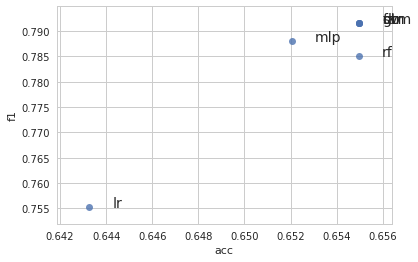

In [25]:
ax = sns.regplot(x=brasil_clf_df["acc"], y=brasil_clf_df["f1"],fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.001, point['y'], str(point['val']),size=14)

label_point(brasil_clf_df["acc"], brasil_clf_df["f1"], brasil_clf_df["classifier"], ax) 

Enquanto o SVM empataca com o classificador Fanático na liderança em F1, o GradientBoosting supera todos em termo de acurácia. Perceba entretanto a escala dos gráficos: a distância entre a acurácia do Fanático e do campeão é de apenas 0.015 pp, ou seja, 5 jogos classificados errados e ambos já seriam equivalentes. Isso indica que nossos dados não são muito bons para prever o desempenho em uma partida. 

Alguns fatores podem estar contribuindo para isso, em que o mais importante parece ser a baixa quantidade de linhas. E essa é a principal desvantagem de fazermos um Digital Twin de um país apenas: nossos classificadores não tem dados o suficiente para aprender algum padrão.

# 3. Digital Twin das seleções

Como usar somente os dados de uma seleção para prever resultados é muito ruim, vamos utilizar os dados de todas.

In [14]:
ranking_fifa['AAAA-MM'] = ranking_fifa['rank_date'].str[:7]
game_result['AAAA-MM'] = game_result['date'].str[:7]
    
game_results_hometeam = pd.merge(game_result.drop(['tournament','city','country','neutral'],axis=1), 
                                 ranking_fifa.drop('country_abrv',axis=1),
                        left_on=['home_team','AAAA-MM'],
                        right_on = ['country_full','AAAA-MM'],
                        how='inner',
                       )

game_results_rk = pd.merge(game_results_hometeam, ranking_fifa.drop('country_abrv',axis=1),
                        left_on=['away_team','AAAA-MM'],
                        right_on = ['country_full','AAAA-MM'],
                        how='inner',
                        suffixes=('','_away')
                       )

game_results_rk.shape

(17308, 36)

In [15]:
game_results_rk['TARGET'] = construct_target(game_results_rk,'home_score','away_score')

E acrescentando as variáveis da timeline:

In [16]:
groups = []

for selecao, group_country_df in game_results_rk.groupby(by='home_team'):
        group_country_tl = add_timeline_team_features(group_country_df)
        groups.append(group_country_tl)

game_results_tl_rk = pd.concat(groups)
game_results_tl_rk.shape

(17308, 61)

Como temos muitos dados, podemos separar um conjunto de testes (20%) e escolher os modelos baseados em um kfold de 5 grupos, refitando o modelo com melhor parametro no conjunto todo de treino ao final.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(game_results_tl_rk[variables], game_results_tl_rk['TARGET'],
                                                  test_size=0.2,shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13846, 48)
(3462, 48)
(13846,)
(3462,)


In [18]:
all_clf_dict =  {}

## Decision Trees

In [37]:
dtc_candidates = {
    'min_samples_leaf' : list(range(1,100)),
    'max_depth' : list(range(2,100)) + [None],
    'class_weight' : [None,'balanced']
}

all_clf_dict['dt'] = test_model(X_train,y_train,DecisionTreeClassifier(),dtc_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 19602 candidates, totalling 98010 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 4776 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 6976 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 15976 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 19776 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 23976 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 28576 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 33576 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 38976 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 44776 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 50976 tasks      | el

	best acc = 0.572945
	best f1 = 0.651633
	best TEST acc = 0.573657
	best TEST f1 = 0.638683


## Support Vector Machine, as multi-classifier

In [39]:
svc_candidates = {
    'C' : [i/1000.0 for i in range(1,2000,1)],
}

all_clf_dict['svc'] = test_model(X_train,y_train,SVC(),svc_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 1999 candidates, totalling 9995 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 123.2min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 161.7min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 205.0min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 254.4min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed: 319.1min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed: 402.5min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed: 507.1min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed: 623.6min
[Parallel(n_jobs=-1)]: Done 9995 out of 9995 | elapsed: 642.9min finished


	best acc = 0.495739
	best f1 = 0.977956
	best TEST acc = 0.482958
	best TEST f1 = 0.615606


## Logistic Regression, One vs Rest

In [40]:
lr_candidates = {
    'penalty' : ['l1','l2'],
    'C' : [x/10.0 for x in range(900,1110,1)],
    'class_weight' : [None,'balanced'],
    'multi_class' : ['ovr']
}

all_clf_dict['lr'] = test_model(X_train,y_train,LogisticRegression(),lr_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 11.3min finished


	best acc = 0.593312
	best f1 = 0.678052
	best TEST acc = 0.583189
	best TEST f1 = 0.668320


## Random Forest

In [41]:
rf_candidates = {
    'min_samples_leaf' : list(range(1,100)),
    'max_depth' : [None],
    'class_weight' : [None,'balanced'],
    'n_estimators' : list(range(10,100,10))
}

all_clf_dict['rf'] = test_model(X_train,y_train,RandomForestClassifier(),rf_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 1782 candidates, totalling 8910 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 8910 out of 8910 | elapsed:  8.5min finished


	best acc = 0.586740
	best f1 = 0.719251
	best TEST acc = 0.578856
	best TEST f1 = 0.656818


## Gradient Boosting

In [43]:
gb_candidates = {
    'min_samples_leaf' : list(range(1,100,10)),
    'max_depth' : [None],
    'n_estimators' : list(range(10,100,10)),
    'learning_rate' : [0.001,0.01,0.1,0.5,1.0]
}

all_clf_dict['gb'] = test_model(X_train,y_train,GradientBoostingClassifier(),gb_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed: 128.5min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed: 162.0min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 186.3min finished


	best acc = 0.585873
	best f1 = 0.728793
	best TEST acc = 0.577123
	best TEST f1 = 0.638024


## Perceptron

In [44]:
mlp_candidates = {
    'alpha' : [0.001,0.01] + [i/10.0 for i in range(1,11)],
    'learning_rate' : ['constant','invscaling', 'adaptive'],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'max_iter' : [1000]
}

all_clf_dict['mlp'] = test_model(X_train,y_train,MLPClassifier(),mlp_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.9min finished


	best acc = 0.587823
	best f1 = 0.667086
	best TEST acc = 0.578278
	best TEST f1 = 0.658022


## Fanático (chuta tudo como 'WIN')

In [45]:
from sklearn.dummy import DummyClassifier

dummy_candidates = {'strategy' : ['most_frequent']}

all_clf_dict['fan'] = test_model(X_train,y_train,DummyClassifier(),dummy_candidates,5,
                                   refit=True,X_test=X_test,y_test=y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
	best acc = 0.487794
	best f1 = 0.655728
	best TEST acc = 0.472559
	best TEST f1 = 0.641820


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Summary

In [47]:
all_clf_list= []
for key in all_clf_dict:
     all_clf_list.append({'classifier' : key, 
                           'train_acc' : all_clf_dict[key]['acc'], 
                           'train_f1' : all_clf_dict[key]['f1'],
                           'test_acc' : all_clf_dict[key]['acc_test'], 
                           'test_f1' : all_clf_dict[key]['f1_test']})

all_clf_df = pd.DataFrame(all_clf_list)

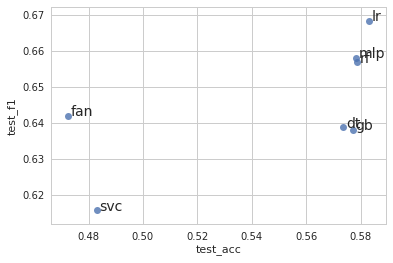

In [48]:
ax = sns.regplot(x=all_clf_df["test_acc"], y=all_clf_df["test_f1"],fit_reg=False)

label_point(all_clf_df["test_acc"], all_clf_df["test_f1"], all_clf_df["classifier"], ax) 

Ao final, parece que nossa simples regressão logítica é a campeão em termos de Acurácia e F1. Mais importante que isso, vários modelos conseguiram ganhos significativos de acurácia em relação fanático, o que mostra ser possível modelar com os dados totais, ao contrário do caso específico do Brasil.

# Prevendo a copa

Agora que encontramos o melhor modelo (LR), vamos fazer uma previsão para os jogos da copa.

Primeiro vamos descobrir quais os melhores parâmetros:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_candidates = {
    'penalty' : ['l1','l2'],
    'C' : [x/10.0 for x in range(900,1110,1)],
    'class_weight' : [None,'balanced'],
    'multi_class' : ['ovr']
}

clf_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_candidates, n_jobs=-1, cv= 5, verbose = True, refit=False)
    
clf_grid.fit(X_train,y_train)
    
print(clf_grid.best_score_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 10.0min


0.5896287736530406


[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed: 10.5min finished


In [20]:
clf_grid.best_params_

{'C': 99.4, 'class_weight': None, 'multi_class': 'ovr', 'penalty': 'l2'}

Agora, vamos retreinar o modelo com todos os dados disponíveis. Isso poderia ser perigoso com um método mais sujeito a overfitting, como o GB, mas regressões com regularização são muito boas para controlar isso.

In [21]:
lr_dt = LogisticRegression(**clf_grid.best_params_)

lr_dt.fit(game_results_tl_rk[variables], game_results_tl_rk['TARGET'])

LogisticRegression(C=99.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Da tabela world_cup vamos montar a agenda da copa:

In [ ]:
team1s = []
team2s = []

import itertools


for group, teams in world_cup.groupby(by='Group',sort=True):
    
    list1=list(teams['Team'])
    list2=list(teams['Team'])

    
    c = list(itertools.product(list1, list2))
    
    print(c)